<a href="https://colab.research.google.com/github/soapycat99/cs_4410/blob/main/CNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [12]:
label_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle Boot'
]

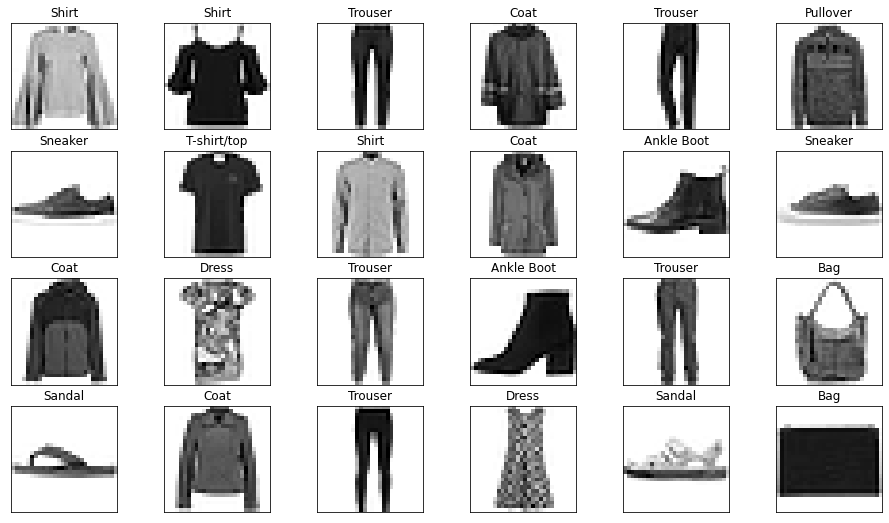

In [13]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(label_names[target])

In [14]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [18]:
X_train = X_train.astype('float32') / 255

In [19]:
X_test = X_test.astype('float32') / 255

In [20]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
from tensorflow.keras.models import Sequential 
cnn = Sequential() 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

In [22]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [23]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [25]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [26]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 118s 139ms/step - loss: 0.4618 - accuracy: 0.8320 - val_loss: 0.3322 - val_accuracy: 0.8785
Epoch 2/5
844/844 [==============================] - 118s 139ms/step - loss: 0.3050 - accuracy: 0.8896 - val_loss: 0.2798 - val_accuracy: 0.8952
Epoch 3/5
844/844 [==============================] - 118s 140ms/step - loss: 0.2587 - accuracy: 0.9044 - val_loss: 0.2678 - val_accuracy: 0.8997
Epoch 4/5
844/844 [==============================] - 117s 139ms/step - loss: 0.2253 - accuracy: 0.9169 - val_loss: 0.2501 - val_accuracy: 0.9073
Epoch 5/5
844/844 [==============================] - 117s 139ms/step - loss: 0.1967 - accuracy: 0.9272 - val_loss: 0.2472 - val_accuracy: 0.9060


In [28]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.2624 - accuracy: 0.9033


In [29]:
loss

0.26235535740852356

In [30]:
accuracy

0.9032999873161316

In [31]:
predictions = cnn.predict(X_test)

In [32]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [34]:
len(incorrect_predictions)

967

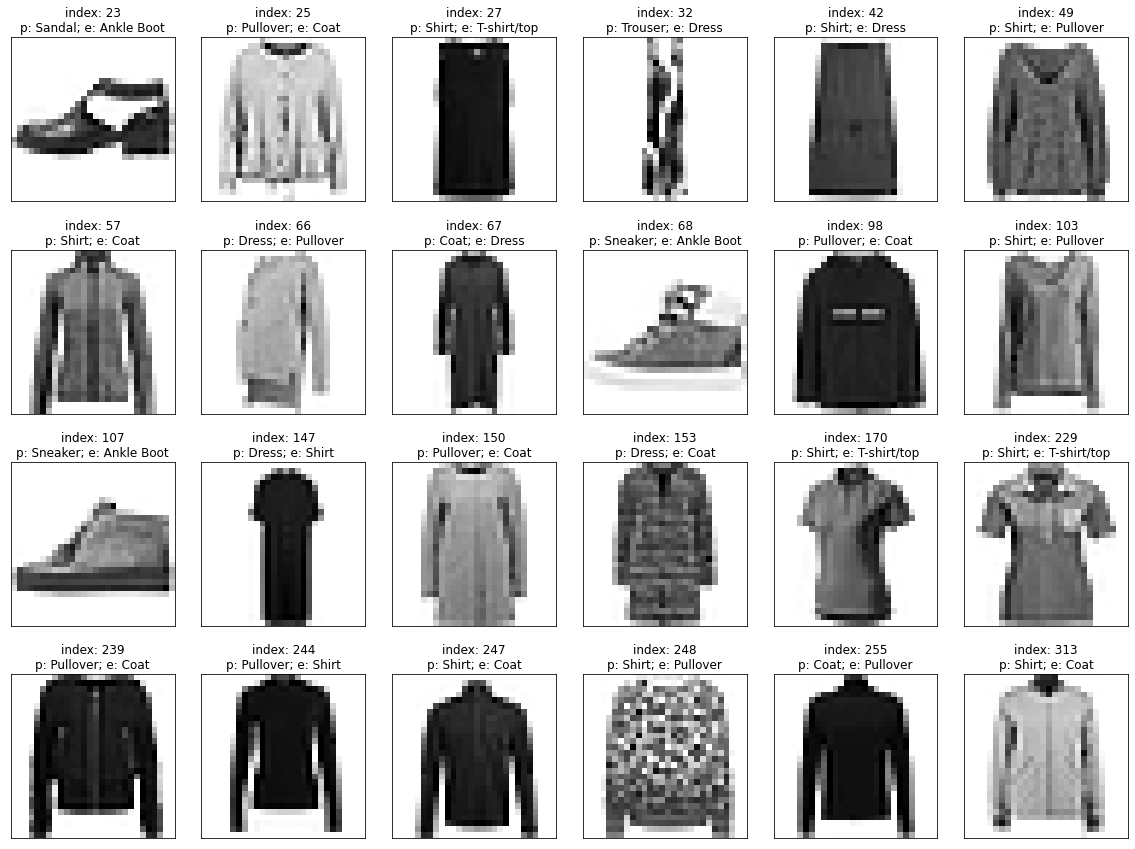

In [35]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {label_names[predicted]}; e: {label_names[expected]}')
plt.tight_layout()

**Run time**: 622.89s (fashion-mnist) vs 622.855 (mnist) 

**Accuracy**: 90.33% (fashion-mnist) vs  99.24% (mnist)
